## Importing Modules and Loading Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # visualization
import math


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
# Reading Csv file
df = pd.read_csv('PoliceKillingsUS.csv', encoding='cp1252')
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


## Information About the Dataset

In [3]:
# Row and Column counts
shape = pd.DataFrame({"Rows": [df.shape[0]],
              "Columns": [df.shape[1]]
              },index=[""]
             )
shape

,Rows,Columns
,2535,14


In [4]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
# Count of null values for each column
df.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [6]:
# Fill null age values with mean
df.age.fillna(int(df.age.mean()), inplace=True)

# Fill null race values with 'unknown'
df.race.fillna('unknown', inplace=True)

df.armed.fillna('unknown', inplace=True)

# Fill null flee values with 'unknown'
df.flee.fillna('unknown', inplace=True)

In [7]:
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [8]:
# Convert age dtype to integer
df['age'] = df['age'].astype(int)

# Convert dtype to datetime
df['date'] = pd.to_datetime(df['date'])

# Seperating month, year and week days
df['day_of_week'] = df['date'].dt.strftime('%A')
df['month'] = df['date'].dt.strftime('%B')
df['year'] = df['date'].dt.year

In [9]:
# Changing abbreviated city states to full form
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
              'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
              'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
              'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
              'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
              'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
              'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
              'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 
              'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
              'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'}

df['state'] = df['state'].map(state_dict)

In [10]:
# Capitalizing column names
df.columns = df.columns.str.capitalize()

# Capitalizing not numeric values
liste = df.columns.values.tolist()

for i in liste:
    if df[i].dtype in ['object']:
        df[i] = df[i].str.capitalize()

In [11]:
# Drop useless columns
df.drop(['Id', 'Name', 'Date'], axis=1, inplace=True)

In [12]:
# Converting M to Male, F to Female in Gender column
df['Gender'] = np.where(df['Gender'] == 'M', 'Male', 'Female')

In [13]:
# Replacing some of race abbreviations to full form
race_mapping = {'W': 'White', 'B': 'Black', 'H': 'Hispanic', 'A': 'Asian', 'N': 'Native American', 'O': 'Other'}

df['Race'] = df['Race'].replace(race_mapping)

In [14]:
# Converting boolean values to Yes, No
df['Signs_of_mental_illness'] = np.where(df['Signs_of_mental_illness'] == True, 'Yes', 'No')
df['Body_camera'] = np.where(df['Body_camera'] == True, 'Yes', 'No')

In [15]:
# Reordering columns
cols = df.columns.tolist()

cols = ['Gender', 'Race', 'Age'] + [col for col in cols if col not in ['Gender', 'Race', 'Age']]

df = df[cols]

In [16]:
df.head()

,Gender,Race,Age,Manner_of_death,Armed,City,State,Signs_of_mental_illness,Threat_level,Flee,Body_camera,Day_of_week,Month,Year
0,Male,Asian,53,Shot,Gun,Shelton,Washington,Yes,Attack,Not fleeing,No,Sunday,February,2015
1,Male,White,47,Shot,Gun,Aloha,Oregon,No,Attack,Not fleeing,No,Sunday,February,2015
2,Male,Hispanic,23,Shot and tasered,Unarmed,Wichita,Kansas,No,Other,Not fleeing,No,Sunday,March,2015
3,Male,White,32,Shot,Toy weapon,San francisco,California,Yes,Attack,Not fleeing,No,Wednesday,April,2015
4,Male,Hispanic,39,Shot,Nail gun,Evans,Colorado,No,Attack,Not fleeing,No,Wednesday,April,2015


In [17]:
# Descriptive statistics
df.describe().drop('count').T.round(1)

,mean,std,min,25%,50%,75%,max
Age,36.6,12.8,6.0,27.0,35.0,45.0,91.0
Year,2015.8,0.8,2015.0,2015.0,2016.0,2016.0,2017.0


## Visualization

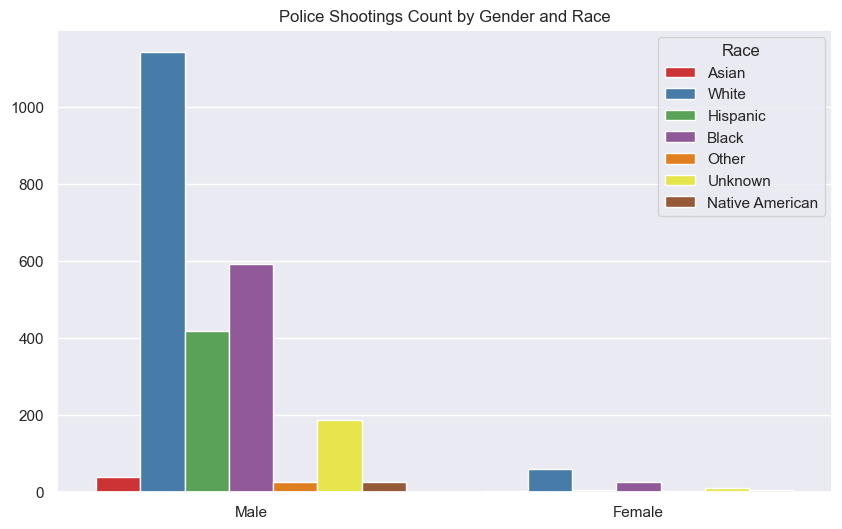

In [18]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x="Gender", hue="Race", data=df, palette="Set1")
plt.title("Police Shootings Count by Gender and Race")
plt.xlabel(None)
plt.ylabel(None)
plt.show(block=True)

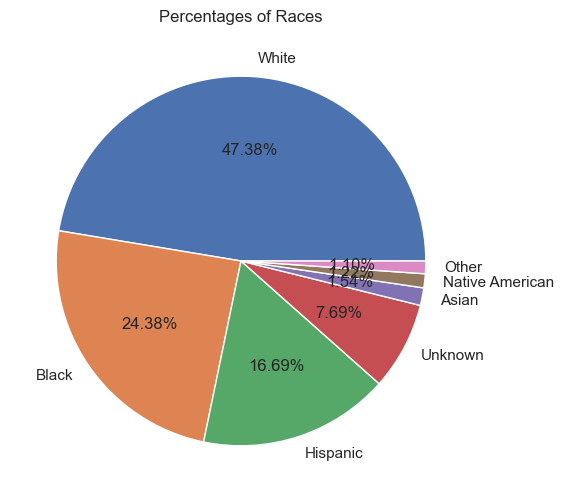

In [21]:
# Value counts percentages of races in pie plot
plt.figure(figsize=(10,6))
label = ['White', 'Black', 'Hispanic', 'Unknown', 'Asian', 'Native American', 'Other']
plt.pie(df['Race'].value_counts(), labels=label,autopct='%1.2f%%')
plt.title("Percentages of Races")
plt.show(block=True)

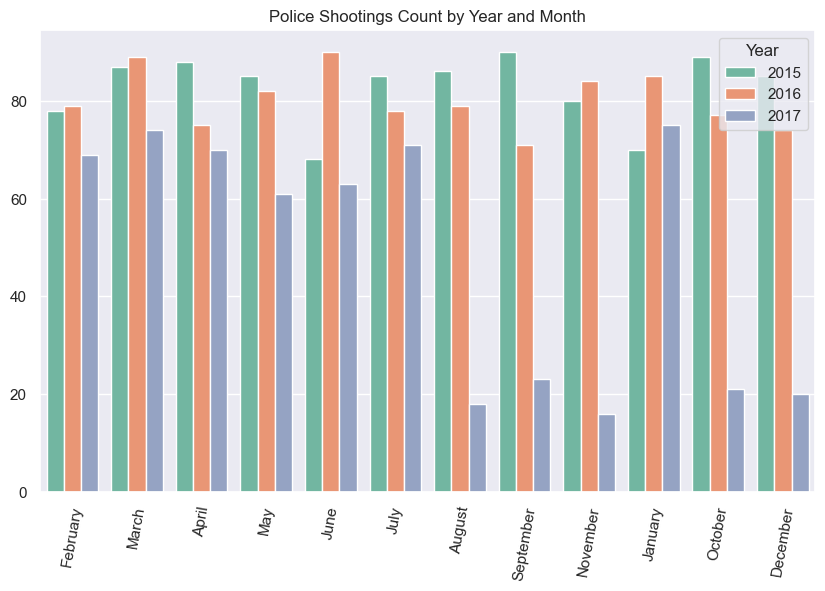

In [22]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x="Month", hue="Year", data=df, palette="Set2")
plt.title("Police Shootings Count by Year and Month")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=80)
plt.show(block=True)

In [23]:
# Converting object values to num
to_num = {'Asian': 1, 'White': 2, 'Hispanic': 3, 'Black': 4, 'Other': 5, 'Unknown': 6, 'Native American': 7}
df['RaceNum'] = df['Race'].map(to_num)

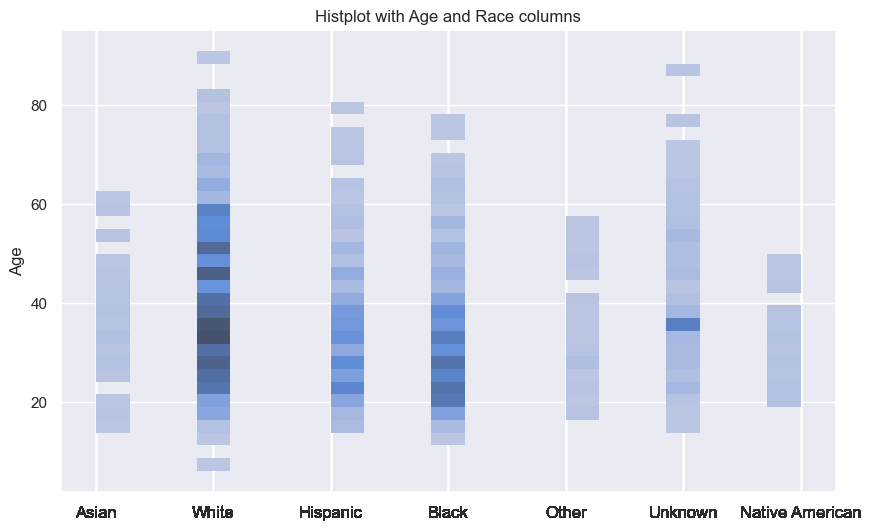

In [24]:
# Histogram plot
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.histplot(x="RaceNum", y="Age", data=df)
plt.title("Histplot with Age and Race columns")

x_labels = {1: 'Asian', 2: 'White', 3: 'Hispanic', 4: 'Black', 5: 'Other', 6: 'Unknown', 7: 'Native American'}
plt.xticks(ticks=df["RaceNum"], labels=[x_labels[val] for val in df["RaceNum"]], color='#2C2C2C', fontsize='12')

plt.xlabel(None)
plt.ylabel('Age')
plt.show(block=True)

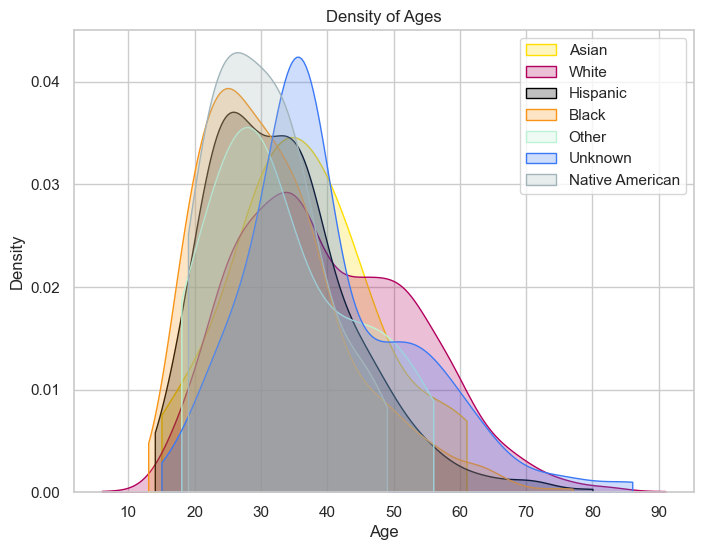

In [25]:
# Density of ages using kdeplot
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
axes.xaxis.set_ticks(np.arange(0,100,10))

sns.kdeplot(df[df.Race == 'Asian'].Age, fill=True, ax=axes, color='#FFDE00', cut=0)
sns.kdeplot(df[df.Race == 'White'].Age, ax=axes, fill=True, color='#B3005E', cut=0)
sns.kdeplot(df[df.Race == 'Hispanic'].Age, ax=axes, fill=True, color='#000000', cut=0)
sns.kdeplot(df[df.Race == 'Black'].Age, ax=axes, fill=True, color='#F99417', cut=0)
sns.kdeplot(df[df.Race == 'Other'].Age, ax=axes, fill=True, color='#BDF2D5', cut=0)
sns.kdeplot(df[df.Race == 'Unknown'].Age, ax=axes, fill=True, color='#3C79F5', cut=0)
sns.kdeplot(df[df.Race == 'Native American'].Age, ax=axes, fill=True, color='#A2B5BB', cut=0)
plt.legend(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Unknown', 'Native American'])
plt.title("Density of Ages")
plt.show(block=True)

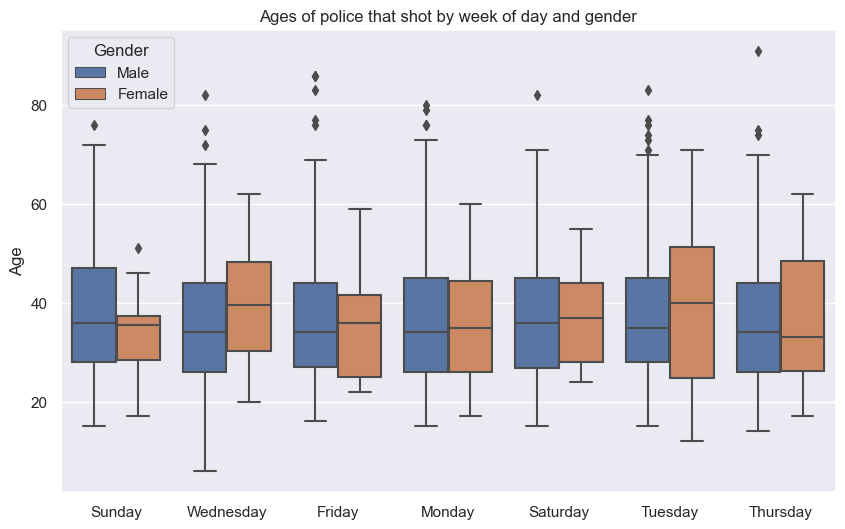

In [26]:
# This plot shows ages of people shot in week days.
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
plt.title("Ages of police that shot by week of day and gender")
sns.boxplot(x=df['Day_of_week'], y=df['Age'], hue=df['Gender'])
plt.xlabel(None)
plt.show(block=True)

In [27]:
# Value Counts
b1 = df['Signs_of_mental_illness'].value_counts(normalize=True)
b2 = df['Threat_level'].value_counts(normalize=True)
b3 = df['Body_camera'].value_counts(normalize=True)
b4 = df['Manner_of_death'].value_counts(normalize=True)

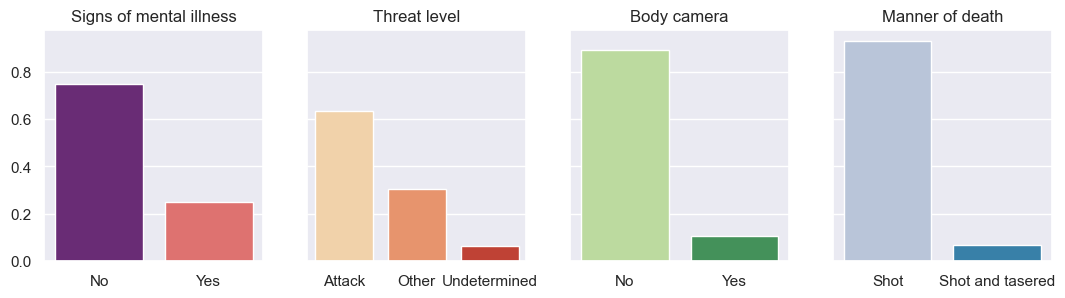

In [28]:
# Counts of Signs of mental illness, Threat level, Body camera, Manner of death

fig, axes = plt.subplots(1, 4, figsize=(13, 3), sharey=True)
sns.set(style="darkgrid")
sns.barplot(x=b1.index, y=b1.values, palette="magma", ax=axes[0])
axes[0].set_title('Signs of mental illness')
sns.barplot(x=b2.index, y=b2.values, palette="OrRd", ax=axes[1])
axes[1].set_title('Threat level')
sns.barplot(x=b3.index, y=b3.values, palette="YlGn", ax=axes[2])
axes[2].set_title('Body camera')
sns.barplot(x=b4.index, y=b4.values, palette="PuBu", ax=axes[3])
axes[3].set_title('Manner of death');

#### Observations

1- %75 of the victims don't have any signs of mental illness.
2- %60 of the cases happened because there is an attack.
3- In %85 of the cases police didn't have a body camera.
4- And almost all of the death happened by shooting

### Top 10 State with the most police shootings

In [29]:
df.groupby('State').agg({'Manner_of_death': 'count'}).sort_values(by='Manner_of_death', ascending=False).head(10)

,Manner_of_death
State,
California,424
Texas,225
Florida,154
Arizona,118
Ohio,79
Oklahoma,78
Colorado,74
Georgia,70
North carolina,69


In [30]:
import folium
# initialize the map and store it in a m object
m = folium.Map(location=[36, -101], zoom_start=5)

In [31]:
coordinates = pd.DataFrame({
   'lon':[-119.4, -100, -81.7, -111, -82.9, -96.9, -105.3, -83.4, -80.7, -92.6],
   'lat':[36.7, 31, 27.9, 34, 40.3, 36, 39.1, 33.2, 35.7, 38.5],
   'name':['California', 'Texas', 'Florida', 'Arizona', 'Ohio', 'Oklahoma', 'Colorado', 'Georgia', 'North carolina', 'Missouri']   
}, dtype=str)


In [32]:
# Top 10 states on map
for i in range(0,len(coordinates)):
   folium.Marker(
      location=[coordinates.iloc[i]['lat'], coordinates.iloc[i]['lon']],
      popup=coordinates.iloc[i]['name'],
      icon=folium.Icon(color='red', icon='warning-sign')
   ).add_to(m)
# Show the map
m